## PROJECT - (28th Aug, 2020 - 13th Sept, 2020) 

In [252]:
# Importing necessary libraries

import pandas as pd       # To read the dataset as a dataframe
import numpy as np        # Importing numpy library
import matplotlib.pyplot as plt       # Necessary module for plotting graphs
%matplotlib inline
import seaborn as sns     # For data visualization      
sns.set(color_codes = True)

from sklearn.model_selection import train_test_split       #Splitting training and testing data
from sklearn.linear_model import LogisticRegression        # For logistic regression model building
from sklearn.naive_bayes import GaussianNB         # For navie bayes model building  
from sklearn.neighbors import KNeighborsClassifier       # for KNN model building
from sklearn import metrics           # Importing metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score
from scipy.stats import zscore       # Importing to find zscore

In [253]:
# Running steps to check and prepare data

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')   

In [254]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [255]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [256]:
df.shape

(5000, 14)

In [257]:
df.size

70000

In [258]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values in the data frame

In [259]:
df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [261]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [262]:
df.describe()  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.

### 2) Study the data distribution in each attribute, share your findings

In [263]:
# Checking how many negative entries are there 

df[df['Experience']<0].Experience.count()

52

There are 52 negative entries in the experience column

In [264]:
# Checking the count of unique negative entries

df[df['Experience']<0].Experience.value_counts()     


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

There are unique negative entries of -1,-2,-3 in the experience column

In [265]:
df.corr()      # Finding correlation for all fields

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Let us clean the experience column by removing the negative values.

We can use the correlation table to check the correlation 'Experience' has with other attributes.

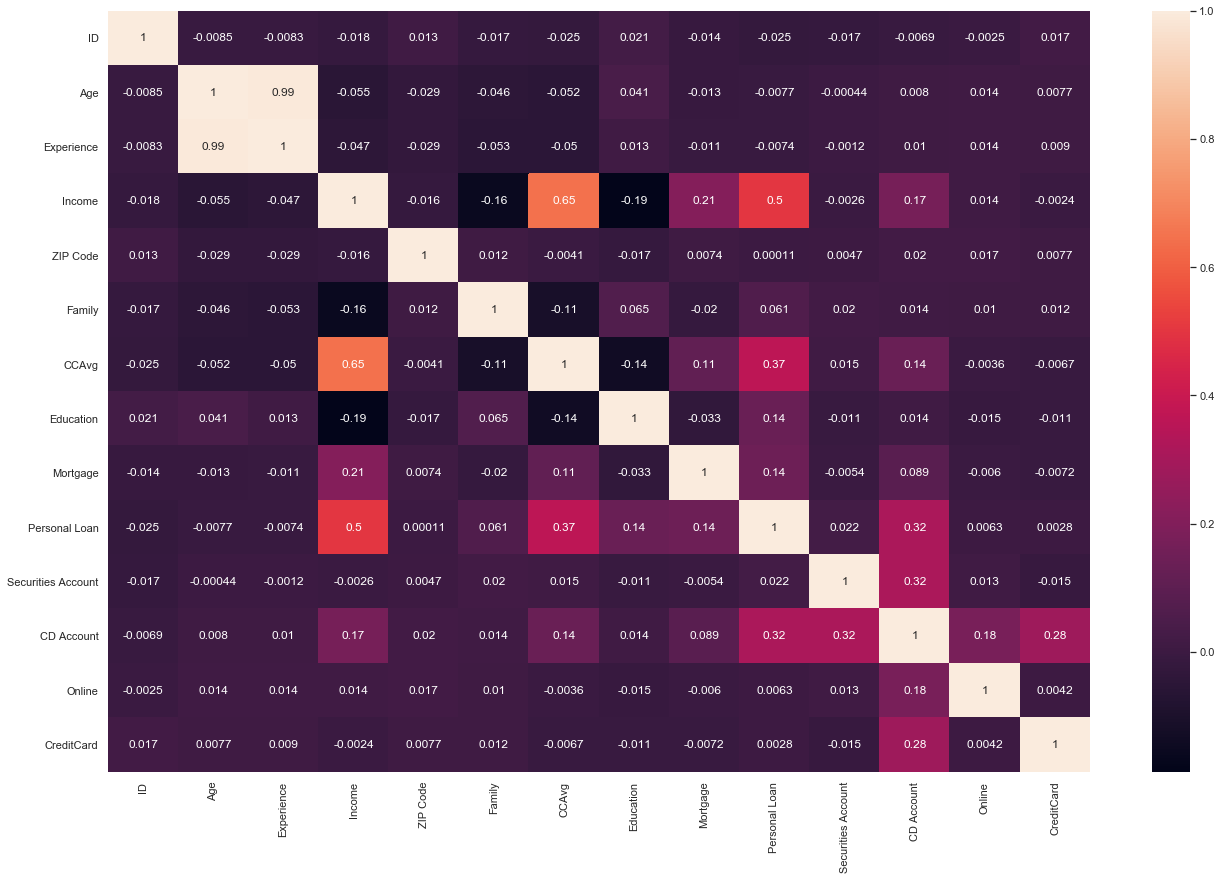

In [266]:
plt.figure(figsize=(22,14))          # Above table represented visually
sns.heatmap(df.corr(), annot=True);

We can see from the above table that Experience is highly correlated with Age, which would help us in our data cleaning process.

In [267]:
# Finding the unique Ages which have -1, -2, -3 entries,
# in the Experience column

df[df['Experience'] == -1]['Age'].value_counts()


25    17
24     6
23     6
29     3
26     1
Name: Age, dtype: int64

In [268]:
# We will find the mean of positive experience values for above ages and
# use it to replace all the experience entries with values -1

n1 = df[df['Experience'] == -1]['Age'].value_counts().index.tolist()
m1 = df[df['Experience'] == -1]['Experience'].index.tolist()

for i in m1:
    df.loc[i, 'Experience'] = df[(df['Age'].isin(n1)) & (df.Experience > 0)].Experience.mean()

In [269]:
# Checking if the values are correctly replaced

df[df['Experience'] == -1]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [270]:
df[df['Experience'] == -2]['Age'].value_counts()

24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [271]:
# We will find the mean of positive experience values for above ages and
# use it to replace all the experience entries with values -2

n2 = df[df['Experience'] == -2]['Age'].value_counts().index.tolist()
m2 = df[df['Experience'] == -2]['Experience'].index.tolist()

for i in m2:
    df.loc[i,'Experience'] = df[(df['Age'].isin(n2)) & (df.Experience > 0)].Experience.mean()

In [272]:
# Checking if the values are correctly replaced

df[df['Experience'] == -2]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [273]:
# We will find the mean of positive experience values for above ages and
# use it to replace all the experience entries with values -3

n3 = df[df['Experience'] == -3]['Age'].value_counts().index.tolist()
m3 = df[df['Experience'] == -3]['Experience'].index.tolist()

for i in m3:
    df.loc[i, 'Experience'] = df[(df['Age'].isin(n3)) & (df.Experience > 0)].Experience.mean()

In [274]:
# Checking if the values are correctly replaced

df[df['Experience'] == -3]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [275]:
df.Experience.describe()

count    5000.000000
mean       20.149833
std        11.391004
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Now the negative values have been removed and we have clean data to work with.

In [276]:
# Finding the distribution in the target column

df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

480 customers have opted for loans out of 5000, in the earlier campaign.

### Dropping the analysis of the "ID" column as it provides no significant information.


### A. Analysing the "Age" column

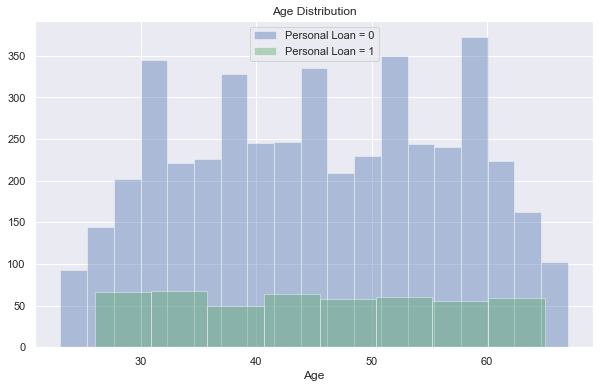

In [277]:
# Plotting a graph for visual analysis of age.

plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 0]['Age'], kde=False, color = 'b', label = 'Personal Loan = 0')
sns.distplot(df[df['Personal Loan'] == 1]['Age'], kde=False, color= 'g', label = 'Personal Loan = 1')
plt.legend()
plt.title('Age Distribution');

In [278]:
# Checking the distribution of age across all age groups.

df['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [279]:
age = pd.cut(df['Age'], bins = [20,30,40,50,60])
pd.crosstab(age, df['Personal Loan']).apply (lambda r : r/r.sum()*100, axis=1)

Personal Loan,0,1
Age,,
"(20, 30]",89.423077,10.576923
"(30, 40]",90.453074,9.546926
"(40, 50]",90.393701,9.606299
"(50, 60]",91.307634,8.692366


From the above distribution we can observe that most of the customers are in the age bracket of (30 to 60 years). We also notice that (10.57%) of the customers who have bought personal loans from the bank are in the bracket of (20 to 30 years). 

Other age groups (30 to 40), (40 to 50), (50 to 60) who have taken personal loans, have a conversion rate between (8.6% to 9.6%).

### B. Analysing the "Experience" column.

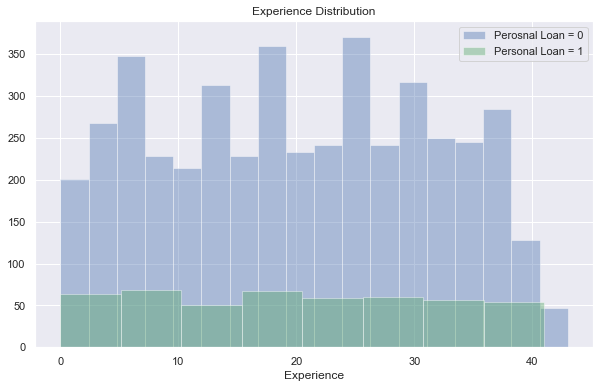

In [280]:
# Plotting a graph for visual analysis of experience.

plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 0]['Experience'], kde=False, color = 'b', label = 'Perosnal Loan = 0')
sns.distplot(df[df['Personal Loan'] == 1]['Experience'], kde= False, color = 'g', label = 'Personal Loan = 1')
plt.legend()
plt.title('Experience Distribution');

In [281]:
# Checking the distribution of Experience 

df['Experience'].value_counts()

32.000000    154
20.000000    148
9.000000     147
5.000000     146
23.000000    144
35.000000    143
25.000000    142
28.000000    138
18.000000    137
19.000000    135
26.000000    134
24.000000    131
3.000000     129
16.000000    127
14.000000    127
30.000000    126
34.000000    125
27.000000    125
17.000000    125
29.000000    124
22.000000    124
7.000000     121
15.000000    119
8.000000     119
6.000000     119
10.000000    118
33.000000    117
13.000000    117
37.000000    116
11.000000    116
36.000000    114
21.000000    113
4.000000     113
31.000000    104
12.000000    102
38.000000     88
39.000000     85
2.000000      85
1.000000      74
0.000000      66
40.000000     57
41.000000     43
2.978495      12
42.000000      8
2.978495       7
2.978495       5
2.760915       5
2.978495       5
2.978495       4
43.000000      3
2.760915       3
2.760915       3
2.760915       2
2.760915       2
2.865353       2
2.865353       2
Name: Experience, dtype: int64

In [282]:
exp = pd.cut(df['Experience'], bins = [0,10,20,30,40,50,60])
pd.crosstab(exp, df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis=1)

Personal Loan,0,1
Experience,,
"(0, 10]",89.697465,10.302535
"(10, 20]",90.582602,9.417398
"(20, 30]",90.853190,9.146810
"(30, 40]",90.661831,9.338169
"(40, 50]",87.037037,12.962963


We can observe that out of the total customers, customers in the experience bracket (40 to 50) show a good conversion rate of (12.96%) for buying personal loans, and in the experience bracket (0 to 10) show a decent conversion rate of (10.30%).

Customers in the experience ranges (10 to 20), (20 to 30), (30 to 40) show a conversion rates between (9.14% to 9.41%).

### C. Analysing the "Income" column.

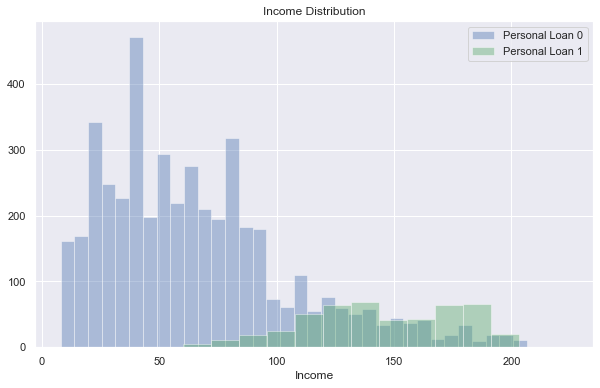

In [283]:
# Plotting a graph for visual analysis of experience.

plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 0]['Income'], kde = False, color = 'b', label = 'Personal Loan 0')
sns.distplot(df[df['Personal Loan'] == 1]['Income'], kde = False, color = 'g', label = 'Personal Loan 1')
plt.legend()
plt.title('Income Distribution');

In [284]:
# Checking the distribution of Income

df[df['Income']>220].Income.value_counts()

224    1
Name: Income, dtype: int64

In [285]:
inc = pd.cut(df['Income'], bins = [0,50,100,150,200,250])
pd.crosstab(inc, df['Personal Loan']). apply (lambda r : r/r.sum()*100, axis=1)

Personal Loan,0,1
Income,,
"(0, 50]",100.000000,0.000000
"(50, 100]",97.758805,2.241195
"(100, 150]",71.428571,28.571429
"(150, 200]",49.530516,50.469484
"(200, 250]",81.250000,18.750000


No customer with an income (<50,000$) opted for a personal loan, whereas (50.46%) of the customers with income within the range of (150 to 200) thousand dollars purchased a personal loan. 

Customers within range of (100 to 150) and (200 to 250) thousand dollars showed a conversion rate of (28.57%) and (18.75%)

### D. Analysing the "Family" column.

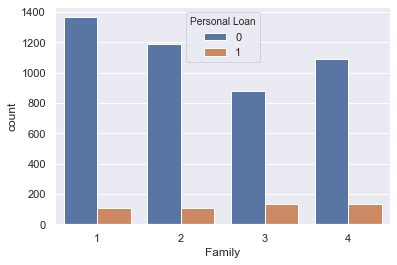

In [286]:
# Plotting a graph for visual analysis of family.

sns.countplot(x = 'Family', hue = 'Personal Loan', data = df);

In [287]:
pd.crosstab(df['Family'], df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
Family,,
1,92.730978,7.269022
2,91.820988,8.179012
3,86.831683,13.168317
4,89.034370,10.965630


(13.16%) of families with family size 3 & (10.96%) of families with family size 4 purchased personal loans. 

Families with size 1 & 2 respectively purchased between (7.26% and 8.17%)

### E. Analysing the "CCAvg" column.

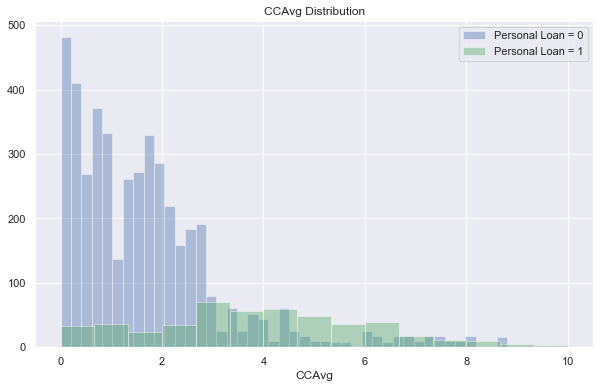

In [288]:
# Plotting a graph for visual analysis of CCAvg.

plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'], kde = False, color = 'b', label = 'Personal Loan = 0')
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'], kde = False, color = 'g', label = 'Personal Loan = 1')
plt.legend()
plt.title('CCAvg Distribution');

In [289]:
df[df['CCAvg']>9].CCAvg.count()

4

In [290]:
cc = pd.cut(df['CCAvg'], bins = [0,2,4,6,8,10])
pd.crosstab(cc, df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
CCAvg,,
"(0, 2]",96.975486,3.024514
"(2, 4]",86.450540,13.549460
"(4, 6]",53.074434,46.925566
"(6, 8]",69.306931,30.693069
"(8, 10]",64.102564,35.897436


Customers with good average spending on credit cards per month show good tendency to purchase personal loans. 

Customers with avg monthly spend on credit cards between (4 to 6) thousand dollars have a (46.92%) conversion rate of purchasing personal loans.

Customer in the range of spending between (6 to 8) & (8 to 10) thousand dollars, show decent conversion rates of (30.69%) and (35.89%) respectively.

### F. Analysing the "Education" column.

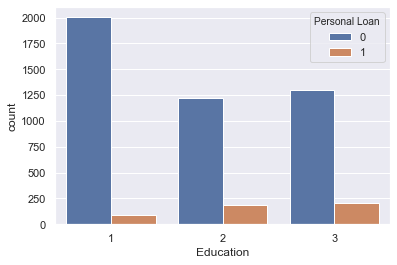

In [291]:
# Plotting a graph for visual analysis of Education.

sns.countplot(x = 'Education', hue = 'Personal Loan', data = df);

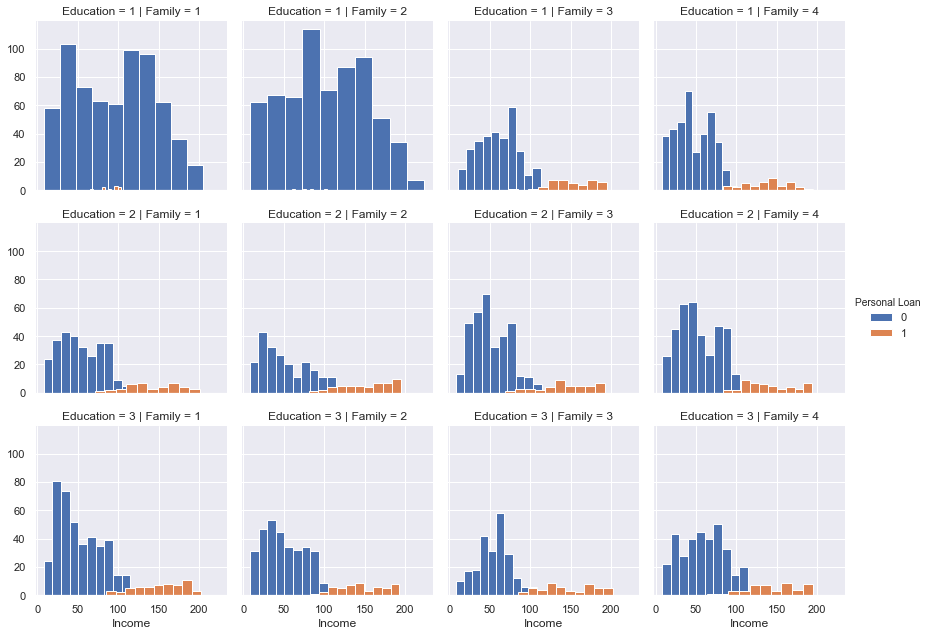

In [292]:
sns.FacetGrid(data=df,row='Education',col='Family',hue='Personal Loan').map(plt.hist,'Income').add_legend();

In [293]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [294]:
pd.crosstab(df['Education'], df['Personal Loan']).apply (lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
Education,,
1,95.562977,4.437023
2,87.027798,12.972202
3,86.342438,13.657562


Customers with "Graduate" & "Advanced/Professional" degree have a good comversion rate of (12.96%) & (13.65%) respectively.

From the above FacetGrid we can conclude that irrespective of their income, undergrads with 1 & 2 family members generally do not opt for personal loans.

### G. Analysing the "Mortgage" column.

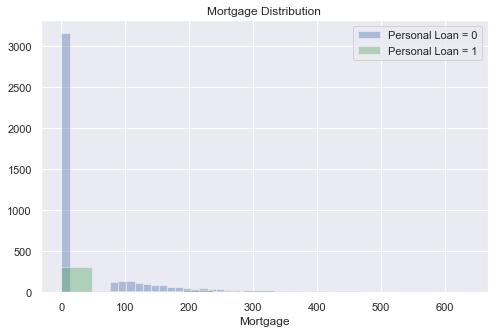

In [295]:
# Plotting a graph for visual analysis of Mortgage.

plt.figure(figsize=(8,5))
sns.distplot(df[df['Personal Loan'] == 0]['Mortgage'], kde = False, color = 'b', label = 'Personal Loan = 0')
sns.distplot(df[df['Personal Loan'] == 1]['Mortgage'], kde = False, color = 'g', label = 'Personal Loan = 1')
plt.legend()
plt.title('Mortgage Distribution');

In [296]:
df[df['Mortgage']>630].Mortgage.value_counts()

635    1
Name: Mortgage, dtype: int64

In [297]:
mort = pd.cut(df['Mortgage'], bins = [0,100,200,300,400,500,600,700])
pd.crosstab(mort, df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
Mortgage,,
"(0, 100]",95.390071,4.609929
"(100, 200]",94.854881,5.145119
"(200, 300]",86.531987,13.468013
"(300, 400]",68.750000,31.250000
"(400, 500]",58.333333,41.666667
"(500, 600]",33.333333,66.666667
"(600, 700]",50.000000,50.000000


Customers having house Mortgagae values in the range (300 to 400), (400 to 500), (500 to 600), (600 to 700) show a good tendency to buy personal loans.

### H. Analysing the "Securities Account" , "CD Account" , "Online" & "Credit Card" columns.

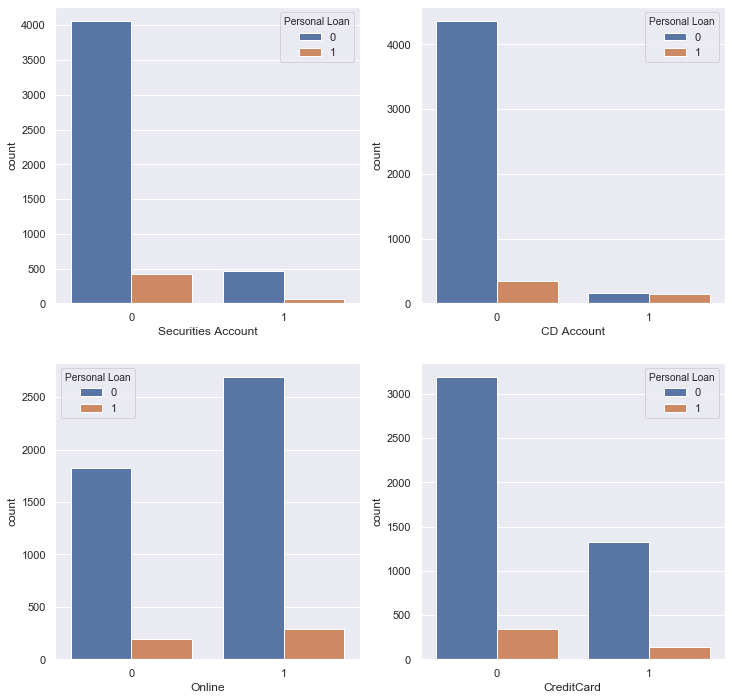

In [298]:
# Plotting a graph for visual analysis of Securities Account, 
# CD Account, Online & Credit Card.

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(df['Securities Account'], hue = df['Personal Loan'])
plt.subplot(2,2,2)
sns.countplot(df['CD Account'], hue = df['Personal Loan'])
plt.subplot(2,2,3)
sns.countplot(df['Online'], hue = df['Personal Loan'])
plt.subplot(2,2,4)
sns.countplot(df['CreditCard'], hue = df['Personal Loan']);

In [299]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [300]:
pd.crosstab(df['Securities Account'], df['Personal Loan']). apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
Securities Account,,
0,90.620813,9.379187
1,88.505747,11.494253


Customers with Securities Account have slightly higher chance of purchasing personal loan @ (11.49%), than those who do not have an account @ (9.37%)

In [301]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [302]:
pd.crosstab(df['CD Account'], df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
CD Account,,
0,92.762878,7.237122
1,53.642384,46.357616


Customers with CD Account have higher chance of purchasing personal loan @ (46.35%), compared to those who do not have CD Accounts @ (7.23%)

In [303]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [304]:
pd.crosstab(df['Online'], df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
Online,,
0,90.625000,9.375000
1,90.247989,9.752011


Customers that use & those who do not utilize the internet banking facilities have negligable difference, in terms of purchasing personal loan.

In [305]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [306]:
pd.crosstab(df['CreditCard'], df['Personal Loan']).apply(lambda r : r/r.sum()*100, axis = 1)

Personal Loan,0,1
CreditCard,,
0,90.453258,9.546742
1,90.272109,9.727891


Customers that use & those who do not utilize the credit card facilities have negligable difference, in terms of purchasing personal loan.

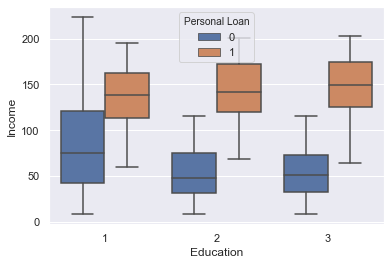

In [307]:
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data=df);

In each education category, one can notice that customers with higher the income tend to buy personal Loans.

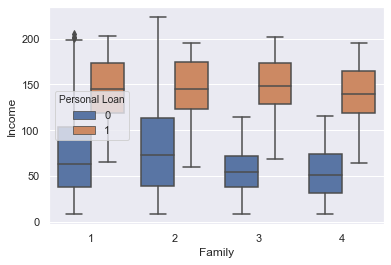

In [308]:
sns.boxplot(x = 'Family', y = 'Income', hue = 'Personal Loan', data=df);

For customers with 1,2,3 or 4 family members, higher income is an important factor to buy personal Loans.

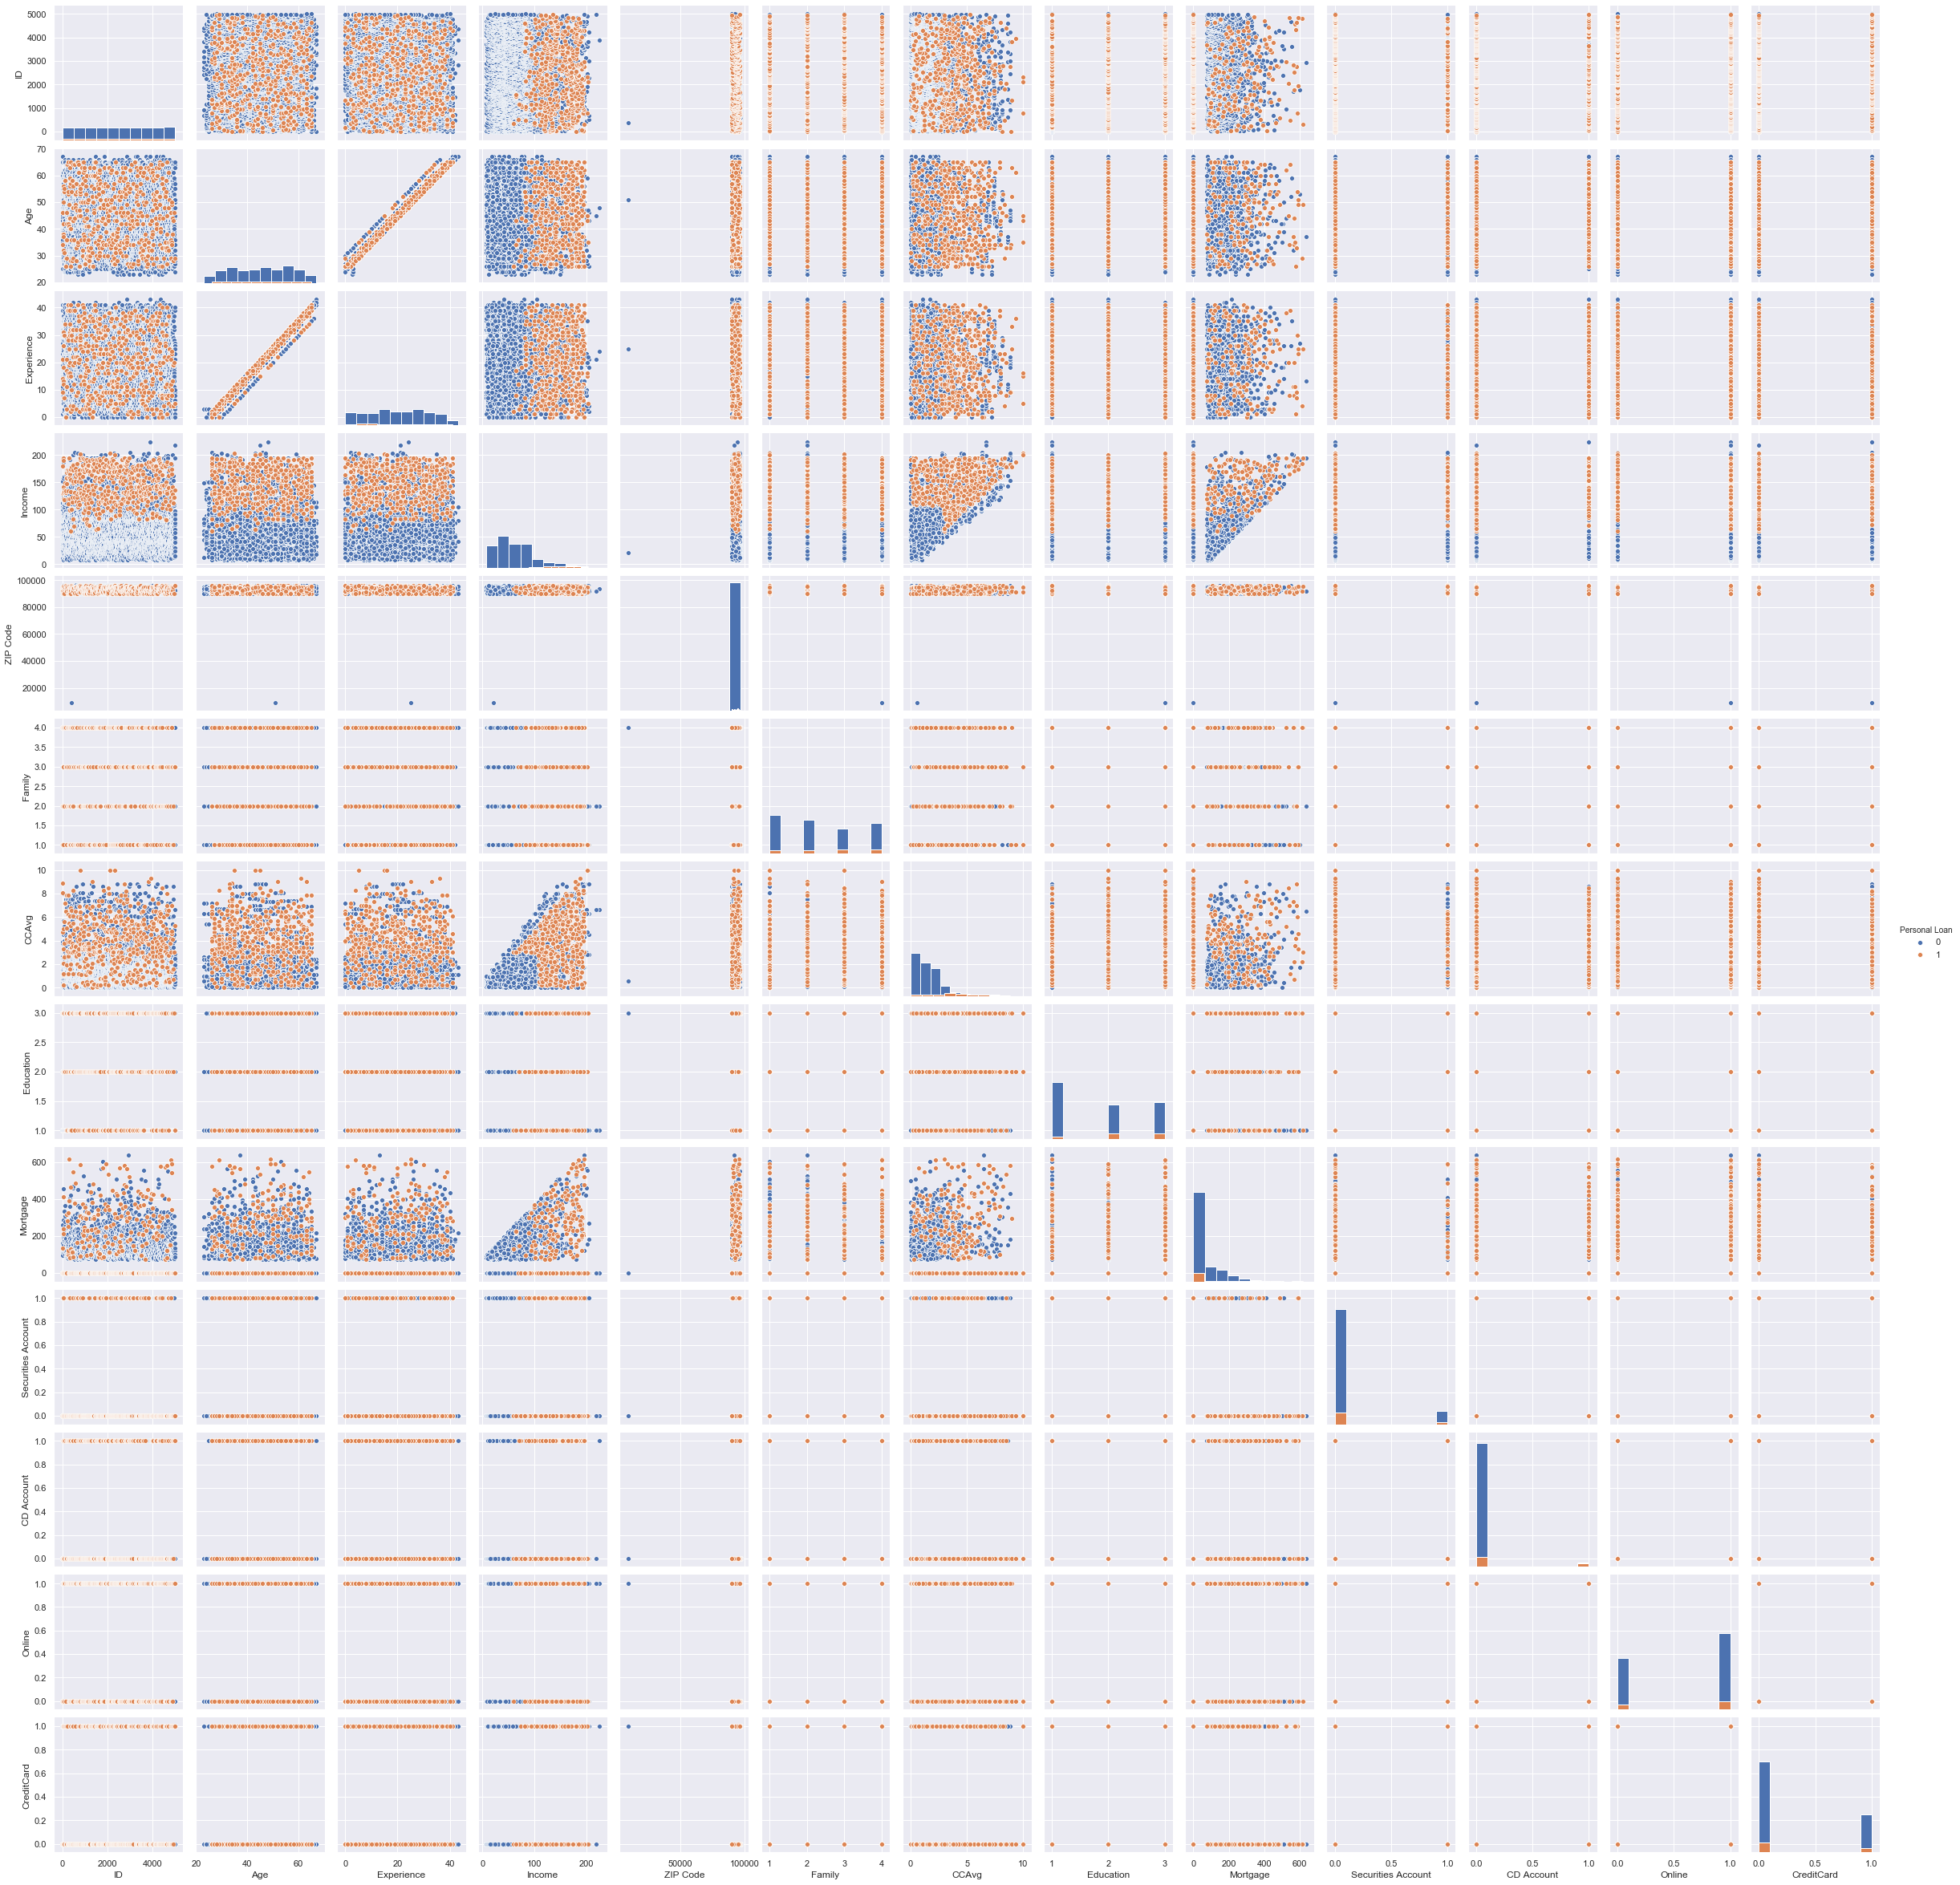

In [309]:
sns.pairplot(df, hue = 'Personal Loan', diag_kind = 'hist');

Age & Experiece have a positive linear relationship

### 3) Get the target column distribution. Your comments

In [310]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We can see that 480 out of 5000 customers opted for personal loan.

In [311]:
# Converting distribution into a data frame

pl_df = df['Personal Loan'].value_counts()
pl_df = pd.DataFrame ({'class' : pl_df.index, 'count' : pl_df.values})

In [312]:
pl_df

,class,count
0,0,4520
1,1,480


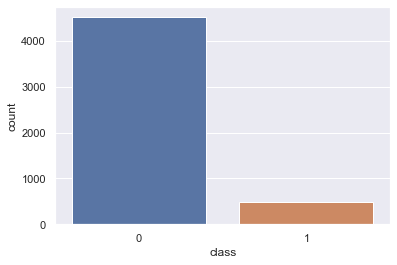

In [313]:
# Plotting a bar plot for the target variable

sns.barplot(x = 'class', y = 'count', data = pl_df);

In [314]:
# Adding percentage to the data frame

pl_df ['Personal Loan'] = pl_df['count']/pl_df['count'].sum()*100
pl_df

,class,count,Personal Loan
0,0,4520,90.4
1,1,480,9.6


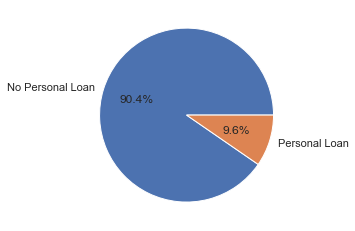

In [315]:
# plotting a pie plot

plt.pie(pl_df['Personal Loan'],labels=['No Personal Loan','Personal Loan'],autopct= '%1.1f%%');

We can see that, (9.6%) of the total customers bought the personal loan in the previous campaign.

### 4) Split the data into training and test set in the ratio of 70:30 respectively.

In [329]:
# Train Test split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.30)

In [330]:
x.dtypes

Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [331]:
from sklearn.impute import SimpleImputer      # Importing necessary library

rep = SimpleImputer(missing_values= 0, strategy = 'mean')     # Replacing 0 values with mean values
cols = x_train.columns
x_train = pd.DataFrame(rep.fit_transform(x_train))
x_test = pd.DataFrame(rep.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


In [332]:
# Checking split data into train and test data sets 

print('{0:2.2f}% Data in Training Set'. format((len(x_train)/len(df.index))*100))
print('{0:2.2f}% Data in Testing Set'. format((len(x_test)/len(df.index))*100))

70.00% Data in Training Set
30.00% Data in Testing Set


In [333]:
x_train.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.0,3500.0,3500.0,3500.0
mean,45.435429,20.511813,73.640000,93154.421429,2.395143,1.976663,1.886286,181.659259,1.0,1.0,1.0,1.0
std,11.507821,11.197805,46.168251,2259.694861,1.145654,1.710921,0.839634,55.338178,0.0,0.0,0.0,0.0
min,23.000000,1.000000,8.000000,9307.000000,1.000000,0.100000,1.000000,75.000000,1.0,1.0,1.0,1.0
25%,35.000000,11.000000,39.000000,91910.000000,1.000000,0.700000,1.000000,181.659259,1.0,1.0,1.0,1.0
50%,45.000000,20.511813,63.000000,93555.000000,2.000000,1.600000,2.000000,181.659259,1.0,1.0,1.0,1.0
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,181.659259,1.0,1.0,1.0,1.0
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.0,1.0,1.0


In [334]:
from sklearn import preprocessing     # Importing the liabrary
                   
scaler = preprocessing.StandardScaler()        # Creating the scaler object 
x_scaled_train = scaler.fit_transform(x_train)       # Fitting train data on scaler object 
x_scaled_test = scaler.fit_transform(x_test)         # Fitting test data on scaler object

In [335]:
x_train.shape

(3500, 12)

In [336]:
x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


### 5) Use different classification models(Logistic, K-NN, Naive Bayes) to predict the likelihood of a customer buying personal loans

### A. Logistic Regression Model Building

In [337]:
x = df.drop (['Personal Loan', 'ID'], axis = 1)      # Dropping certain fields from the independent variables
y = df[['Personal Loan']]

In [338]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_scaled_train, y_train.values.ravel())     # Fitting model on training set 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [339]:
logmodel.score(x_scaled_train, y_train)       # Training Data Score

0.9448571428571428

In [340]:
y_pred = logmodel.predict(x_scaled_test)
log_acc = accuracy_score(y_test, y_pred) # Getting accuracy score of model on test data
log_F1 = f1_score(y_test, y_pred)       # Getting f1 score of the model
log_rec = recall_score(y_test, y_pred)     # Getting recall score of the model
log_conf = confusion_matrix(y_test, y_pred)     # Visualizing the confusion matrix
log_classrep = classification_report(y_test, y_pred)      # Visualizing the classification report

In [341]:
print('The Accuracy of the model is {0:.2f}%'. format(log_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(log_f1*100))
print()
print('The Recall Score of the model is {0:.2f}%'.format(log_rec*100))
print()
print('The Confusion Matrix for Logistic Regression is : \n', log_conf)
print()
print('Detailed Classification Report for Logistic Regression is : \n', log_classrep)

The Accuracy of the model is 94.13%

The F1 score of the model is 64.52%

The Recall Score of the model is 53.69%

The Confusion Matrix for Logistic Regression is : 
 [[1332   19]
 [  69   80]]

Detailed Classification Report for Logistic Regression is : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.81      0.54      0.65       149

    accuracy                           0.94      1500
   macro avg       0.88      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [342]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logmodel.coef_[0][idx]))    

The coefficient for Age is -0.07723641933259393
The coefficient for Experience is 0.18355329649373042
The coefficient for Income is 2.4250016860450647
The coefficient for ZIP Code is 0.06038287964126551
The coefficient for Family is 0.8174041697758794
The coefficient for CCAvg is 0.28789282760279467
The coefficient for Education is 1.3790083219647198
The coefficient for Mortgage is 0.07006608942143246
The coefficient for Securities Account is 0.0
The coefficient for CD Account is 0.0
The coefficient for Online is 0.0
The coefficient for CreditCard is 0.0


The Coefficient for each variable is described above

In [343]:
intercept = logmodel.intercept_[0]
print("The intercept for our model is {}".format(intercept))    # Finding the intercept for the model

The intercept for our model is -4.467688901603988


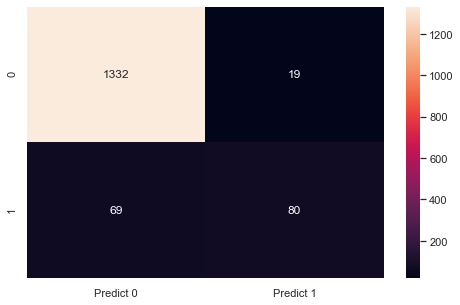

In [344]:
# Plotting confusion matrix graphically.

cm = metrics.confusion_matrix(y_test, y_pred, labels= [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['0','1']],
                    columns = [ i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(8,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### B. K-NN Model Building

In [345]:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(x_scaled_train, y_train.values.ravel())       # Fitting model on training set 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [346]:
KNNModel.score(x_scaled_train, y_train)      # Training Data Score

0.9768571428571429

In [347]:
ypred = KNNModel.predict(x_scaled_test)
KNN_acc = accuracy_score(y_test, ypred)      # Getting accuracy score of model on test data
KNN_F1 = f1_score(y_test, ypred)             # Getting f1 score of the model
KNN_rec = recall_score(y_test, ypred)        # Getting recall score of the model
KNN_conf = confusion_matrix(y_test, ypred)     # Visualizing the confusion matrix
KNN_classrep = classification_report(y_test, ypred)     # Visualizing the classification report

In [348]:
print('The Accuracy Score for the model is {0:.2f}%'. format(KNN_acc*100))
print()
print('The F1 Score for the model is {0:.2f}%'. format(KNN_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(KNN_rec*100))
print()
print('The Confusion Matrix for KNN Model is : \n' , KNN_conf)
print()
print('Detailed Classification Report for KNN Model is : \n', KNN_classrep)

The Accuracy Score for the model is 96.67%

The F1 Score for the model is 80.00%

The Recall Score of the model is 67.11%

The Confusion Matrix for KNN Model is : 
 [[1350    1]
 [  49  100]]

Detailed Classification Report for KNN Model is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.99      0.67      0.80       149

    accuracy                           0.97      1500
   macro avg       0.98      0.84      0.89      1500
weighted avg       0.97      0.97      0.96      1500



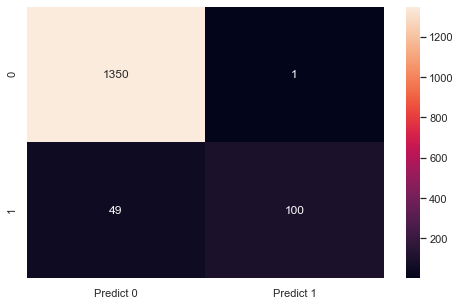

In [349]:
# Plotting confusion matrix graphically.

cm1 = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
df_cm1 = pd.DataFrame (cm1, index = [ i for i in ['0', '1']],
                      columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(8,5))
sns.heatmap(df_cm1, annot=True, fmt='g');

### C. Naive Bayes Model Building

In [350]:
Gaumodel = GaussianNB()
Gaumodel.fit(x_scaled_train, y_train.values.ravel())      # Fitting model on training set 

GaussianNB(priors=None, var_smoothing=1e-09)

In [351]:
Gaumodel.score(x_scaled_train, y_train)        # Training Data Score

0.9045714285714286

In [352]:
pred_y = Gaumodel.predict(x_scaled_test)
Gau_acc = accuracy_score(y_test, pred_y)      # Getting accuracy score of model on test data
Gau_F1 = f1_score(y_test, pred_y)             # Getting f1 score of the model
Gau_rec = recall_score(y_test, pred_y)        # Getting the recall score of the model
Gau_conf = confusion_matrix(y_test, pred_y)         # Visualizing the confusion matrix
Gau_classrep = classification_report(y_test, pred_y)       # Visualizing the classification report

In [353]:
print('The Accuracy Score for the model is {0:.2f}%'. format(Gau_acc*100))
print()
print('The F1 Score for the model is {0:.2f}%'. format(Gau_F1*100))
print()
print('The Recall score for the model is {0:.2f}%'.format(Gau_rec*100))
print()
print('The Confusion Matarix for Naive Bayes model is : \n', Gau_conf)
print()
print('The Classification Report for Naive Bayes model is : \n', Gau_classrep)


The Accuracy Score for the model is 88.60%

The F1 Score for the model is 46.06%

The Recall score for the model is 48.99%

The Confusion Matarix for Naive Bayes model is : 
 [[1256   95]
 [  76   73]]

The Classification Report for Naive Bayes model is : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1351
           1       0.43      0.49      0.46       149

    accuracy                           0.89      1500
   macro avg       0.69      0.71      0.70      1500
weighted avg       0.89      0.89      0.89      1500



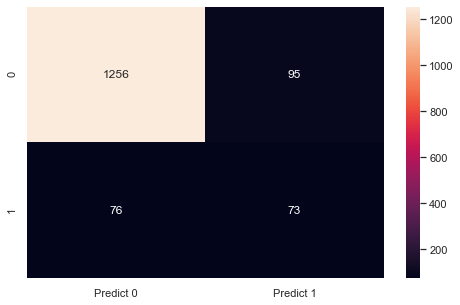

In [354]:
# Plotting confusion matrix graphically.

cm2 = metrics.confusion_matrix(y_test, pred_y, labels=[0,1])
df_cm2 = pd.DataFrame(cm2, index=[i for i in ['0','1']],
                     columns = [i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(8,5))
sns.heatmap(df_cm2, annot=True, fmt='g')

In [355]:
# Building a data frame of all the algorithms used

df_comp = pd.DataFrame({'Algorithm':['Log Reg', 'Naive Bayes', 'K-NN'],
                        'Accuracy (%)':[log_acc*100,Gau_acc*100,KNN_acc*100],    # Pulling out accuracy score of all 3 models
                        'F1-score (%)':[log_F1*100,Gau_F1*100,KNN_F1*100],       # Pulling out F1 score of all 3 models
                        'Recall Score(%)':[log_rec*100,Gau_rec*100,KNN_rec*100]})     # Pulling out recall score of all 3 models

print("Following table shows comparison of the classification algorithms (using scaled data): ")
df_comp

Following table shows comparison of the classification algorithms (using scaled data): 


,Algorithm,Accuracy (%),F1-score (%),Recall Score(%)
0,Log Reg,94.133333,64.516129,53.691275
1,Naive Bayes,88.600000,46.056782,48.993289
2,K-NN,96.666667,80.000000,67.114094


Tabular visualization of the alogrithms inorder to analyse the best one which fits the data set.

### 7) Give your reasoning on which is the best model in this case and why it performs better?

###  From the above tabular description, we can clearly state the winner between the three models is, the KNN Model with 3 Neighbors as it gives us an Accuracy score of (96.66%) , F1 Score of (80.00%) & Recall Score of (67.11%). One can say that this is due to K-NN classifiers rigidity/robutness to outliers, and can work for multiclasses simultaneously.